# Toolkit

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Import and Inspect data

In [10]:
df = pd.read_csv(r"Data/College_Data.csv")
df.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [11]:
# random sample
df.sample(5)

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
566,SUNY College at Buffalo,No,5318,3515,1025,8,29,7626,2091,6550,4040,550,1230,71,78,18.7,12,7511,42
126,College of Mount St. Joseph,Yes,798,620,238,14,41,1165,1232,9800,4430,400,1150,46,46,11.1,35,6889,100
678,University of Southern Colorado,No,1401,1239,605,10,34,3716,675,7100,4380,540,2948,63,88,19.4,0,5389,36
518,Seton Hall University,Yes,4576,3565,1000,16,36,4384,1530,12000,6484,650,1000,81,84,14.4,15,10080,64
425,Norwich University,Yes,1743,1625,626,8,29,1862,382,14134,5270,500,800,71,74,13.1,22,9209,63


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   University   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [13]:
df.columns

Index(['University', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

# Preprocessing

In [14]:
df.duplicated().sum()

0

# FS

In [15]:
df.drop('University', axis=1, inplace=True)

# Model

In [16]:
df = pd.get_dummies(df, drop_first=True)

In [17]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [18]:
df_scaled = pd.DataFrame(df_scaled, columns= df.columns)

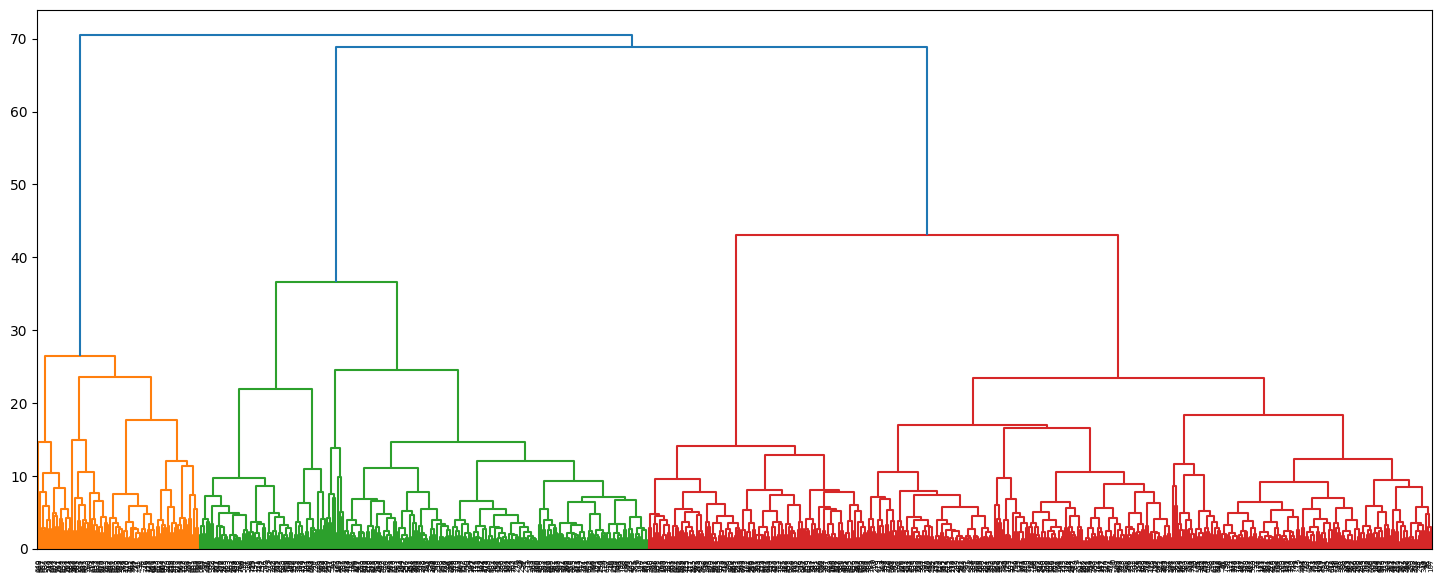

In [21]:
plt.figure(figsize=(18, 7))
dendogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))

In [20]:
model = AgglomerativeClustering(n_clusters=3)
model.fit(df_scaled)

AgglomerativeClustering(n_clusters=3)